In [188]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from tqdm import tqdm

In [20]:
def DotsCoordinates(n, k, a):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    
    Возвращает матрицу, в которой построчно записаны координаты точек
    '''
    
    result = np.zeros((k,n))
    for i in range(k):
        result[i] = np.random.uniform(0,a,n)
        
    return result

In [23]:
def EuclidMatrix(coord_matrix):
    
    '''
    coord_matrix - матрица с координатами точек (ее возвращает DotsCoordinates)
    
    Возвращает матрицу, в ячейке [i,j] которой записано евклидово расстояние между i-й и j-й точками матрицы coord_matrix
    '''
    
    result = np.zeros((len(coord_matrix), len(coord_matrix)))
    for i in range(len(result)):
        for j in range(len(result)):
            result[i,j] = distance.euclidean(coord_matrix[i], coord_matrix[j])
    return result

In [187]:
matrix = DotsCoordinates(500, 500, 1)
euc = EuclidMatrix(matrix)
adj_matrix = np.zeros((len(matrix), len(matrix)))

10.2384321168
Граф стал связным при eps =  8.799999999999983


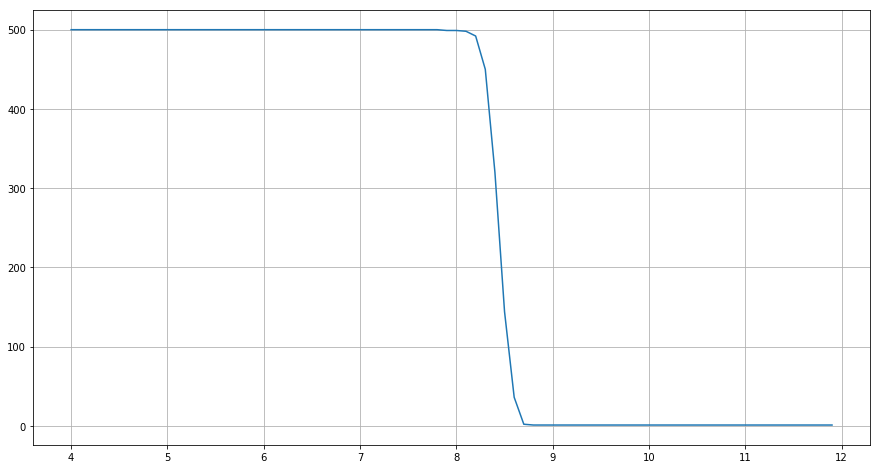

In [192]:
eps = 4
components_arr = np.array([])
flag = False
for i in range(80):
    elems = list(zip(*np.where(euc < eps)))
    adj_matrix = np.zeros((len(matrix), len(matrix)))
    for j in range(len(elems)):
        adj_matrix[elems[j][0]][elems[j][1]] = 1
    components = csgraph.connected_components(adj_matrix)[0]
    components_arr = np.append(components_arr, components)
    if (components == 1 and flag == False):
        print('Граф стал связным при eps = ', eps)
        flag = True
    eps += 0.1
    
X = np.arange(4, 12, 0.1)
fig = plt.figure(figsize=(15,8))
plt.plot(X, components_arr)
plt.legend()
plt.grid()
plt.show()

In [165]:
print(len(num))

0
